In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls data

Taxi_Trips.csv


In [3]:
df = pd.read_csv('data/Taxi_Trips.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5516448 entries, 0 to 5516447
Data columns (total 15 columns):
Trip ID                   object
Taxi ID                   object
Trip Start Timestamp      object
Trip End Timestamp        object
Trip Seconds              float64
Trip Miles                float64
Pickup Community Area     int64
Dropoff Community Area    float64
Fare                      object
Tips                      object
Tolls                     object
Extras                    object
Trip Total                object
Payment Type              object
Company                   object
dtypes: float64(3), int64(1), object(11)
memory usage: 631.3+ MB


In [7]:
df.columns = [c.lower().replace(' ', '_') for c in df.columns]

In [8]:
df.columns

Index(['trip_id', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
       'trip_seconds', 'trip_miles', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras',
       'trip_total', 'payment_type', 'company'],
      dtype='object')

In [9]:
df.isnull().sum()

trip_id                         0
taxi_id                       887
trip_start_timestamp            0
trip_end_timestamp              0
trip_seconds                  107
trip_miles                      0
pickup_community_area           0
dropoff_community_area     187247
fare                            1
tips                            1
tolls                           1
extras                          1
trip_total                      1
payment_type                    0
company                   2459242
dtype: int64

In [10]:
df.corr()

,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area
trip_seconds,1.000000,0.193383,0.470823,0.291811
trip_miles,0.193383,1.000000,0.141257,0.086233
pickup_community_area,0.470823,0.141257,1.000000,-0.000912
dropoff_community_area,0.291811,0.086233,-0.000912,1.000000


In [11]:
df[df.tips.isnull()]

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company
1538902,8935a6c78bdb3052292b921a2445c97af0dc06bd,bbe269b05eeac2abb17fea3c531aaa9c65b92e40c832dc...,06/07/2016 11:45:00 AM,06/07/2016 11:45:00 AM,120.0,100.0,15,15.0,NaN,NaN,NaN,NaN,NaN,Credit Card,NaN


In [14]:
df.dropna(subset=['fare'], inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5516447 entries, 0 to 5516447
Data columns (total 15 columns):
trip_id                   object
taxi_id                   object
trip_start_timestamp      object
trip_end_timestamp        object
trip_seconds              float64
trip_miles                float64
pickup_community_area     int64
dropoff_community_area    float64
fare                      object
tips                      object
tolls                     object
extras                    object
trip_total                object
payment_type              object
company                   object
dtypes: float64(3), int64(1), object(11)
memory usage: 673.4+ MB


In [17]:
df.head(5)

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company
0,0171ea69627693e2cef3fa233a88f7b822056cf7,718e14c3dcea2b17d67bf6277da06c7402e1435c96b460...,07/19/2016 07:15:00 PM,07/19/2016 08:15:00 PM,2880.0,1.1,76,8.0,$46.00,$8.00,$0.00,$5.00,$59.00,Credit Card,Taxi Affiliation Services
1,0171ef157f8e29d82ba0429536ceba31e355a6bc,f80bb6e887a18028617ef0e0861429d12762cfd858bcbc...,05/08/2016 05:45:00 PM,05/08/2016 06:30:00 PM,2040.0,16.3,76,8.0,$39.25,$10.81,$0.00,$4.00,$54.56,Credit Card,NaN
2,0171ef8a43930d0824d2180ad3911b2256aae41d,40aed61177db25fbb6eea25b46c3f674ddbd7d42d93e6f...,05/26/2016 05:00:00 PM,05/26/2016 05:15:00 PM,600.0,1.4,32,8.0,$7.50,$2.00,$0.00,$0.00,$9.50,Credit Card,Dispatch Taxi Affiliation
3,0171f00f1e267a4eb7b673002222d385928df7ce,fdc3156afe8accb70f5aea5f2cd2d7cefd089d13b6d930...,09/29/2016 06:30:00 PM,09/29/2016 06:45:00 PM,1260.0,0.4,32,3.0,$21.00,$4.20,$0.00,$0.00,$25.20,Credit Card,Taxi Affiliation Services
4,0171f8dab9ce4d3b52fc0aaca11454cb67d3eba4,0aafa031f499a377150605b9f9c94c933ce52cabc6e43d...,06/18/2016 09:30:00 AM,06/18/2016 10:00:00 AM,1560.0,17.7,8,76.0,$43.75,$9.85,$0.00,$5.00,$59.10,Credit Card,NaN


In [19]:
for c in ['fare', 'tips', 'tolls', 'extras', 'trip_total']:
    df[c] = df[c].apply(lambda x: float(str(x).translate(str.maketrans(dict.fromkeys(['$',','])))))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5516447 entries, 0 to 5516447
Data columns (total 15 columns):
trip_id                   object
taxi_id                   object
trip_start_timestamp      object
trip_end_timestamp        object
trip_seconds              float64
trip_miles                float64
pickup_community_area     int64
dropoff_community_area    float64
fare                      float64
tips                      float64
tolls                     float64
extras                    float64
trip_total                float64
payment_type              object
company                   object
dtypes: float64(8), int64(1), object(6)
memory usage: 673.4+ MB


In [21]:
# for c in ['trip_start_timestamp', 'trip_end_timestamp']:
#     df[c] = df[c].apply(lambda x: pd.to_datetime(x))

In [22]:
df.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company
0,0171ea69627693e2cef3fa233a88f7b822056cf7,718e14c3dcea2b17d67bf6277da06c7402e1435c96b460...,07/19/2016 07:15:00 PM,07/19/2016 08:15:00 PM,2880.0,1.1,76,8.0,46.00,8.00,0.0,5.0,59.00,Credit Card,Taxi Affiliation Services
1,0171ef157f8e29d82ba0429536ceba31e355a6bc,f80bb6e887a18028617ef0e0861429d12762cfd858bcbc...,05/08/2016 05:45:00 PM,05/08/2016 06:30:00 PM,2040.0,16.3,76,8.0,39.25,10.81,0.0,4.0,54.56,Credit Card,NaN
2,0171ef8a43930d0824d2180ad3911b2256aae41d,40aed61177db25fbb6eea25b46c3f674ddbd7d42d93e6f...,05/26/2016 05:00:00 PM,05/26/2016 05:15:00 PM,600.0,1.4,32,8.0,7.50,2.00,0.0,0.0,9.50,Credit Card,Dispatch Taxi Affiliation
3,0171f00f1e267a4eb7b673002222d385928df7ce,fdc3156afe8accb70f5aea5f2cd2d7cefd089d13b6d930...,09/29/2016 06:30:00 PM,09/29/2016 06:45:00 PM,1260.0,0.4,32,3.0,21.00,4.20,0.0,0.0,25.20,Credit Card,Taxi Affiliation Services
4,0171f8dab9ce4d3b52fc0aaca11454cb67d3eba4,0aafa031f499a377150605b9f9c94c933ce52cabc6e43d...,06/18/2016 09:30:00 AM,06/18/2016 10:00:00 AM,1560.0,17.7,8,76.0,43.75,9.85,0.0,5.0,59.10,Credit Card,NaN


In [24]:
df.payment_type.value_counts()

Credit Card    5516447
Name: payment_type, dtype: int64

In [25]:
df_sample = df.sample(n=100000)

In [27]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1862170 to 3515362
Data columns (total 15 columns):
trip_id                   100000 non-null object
taxi_id                   99983 non-null object
trip_start_timestamp      100000 non-null object
trip_end_timestamp        100000 non-null object
trip_seconds              99999 non-null float64
trip_miles                100000 non-null float64
pickup_community_area     100000 non-null int64
dropoff_community_area    96581 non-null float64
fare                      100000 non-null float64
tips                      100000 non-null float64
tolls                     100000 non-null float64
extras                    100000 non-null float64
trip_total                100000 non-null float64
payment_type              100000 non-null object
company                   55475 non-null object
dtypes: float64(8), int64(1), object(6)
memory usage: 12.2+ MB


In [28]:
df_sample.tips.describe()

count    100000.000000
mean          3.658688
std           3.298073
min           0.000000
25%           2.000000
50%           2.250000
75%           4.050000
max         120.000000
Name: tips, dtype: float64

In [29]:
df_sample.fare.describe()

count    100000.000000
mean         16.750377
std          14.450045
min           0.000000
25%           7.000000
50%          10.000000
75%          20.750000
max         307.000000
Name: fare, dtype: float64

In [30]:
df_sample['tip_percent'] = df_sample['tips'] / df_sample.fare

In [31]:
df_sample.tip_percent.describe()

count    9.999800e+04
mean              inf
std               NaN
min      0.000000e+00
25%      2.000000e-01
50%      2.230769e-01
75%      2.985507e-01
max               inf
Name: tip_percent, dtype: float64

In [34]:
df_sample = df_sample[df.fare != 0].copy()

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [35]:
df_sample.tip_percent.describe()

count    99996.000000
mean         0.249103
std          0.156655
min          0.000000
25%          0.200000
50%          0.223077
75%          0.298551
max         16.428571
Name: tip_percent, dtype: float64

(0, 1)

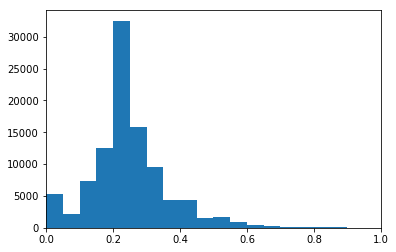

In [43]:
import numpy as np

plt.hist(df_sample.tip_percent, bins=np.arange(0,1,.05))
plt.xlim([0,1])

In [100]:
df_sample['zero_tip'] = df_sample.tips.apply(lambda x: 1 if x == 0 else 0)

In [102]:
df_sample = pd.get_dummies(df_sample, columns=['pickup_community_area'])

In [138]:
df_sample.columns[-60:]

Index(['pickup_community_area_9', 'pickup_community_area_10',
       'pickup_community_area_11', 'pickup_community_area_12',
       'pickup_community_area_13', 'pickup_community_area_14',
       'pickup_community_area_15', 'pickup_community_area_16',
       'pickup_community_area_17', 'pickup_community_area_18',
       'pickup_community_area_19', 'pickup_community_area_20',
       'pickup_community_area_21', 'pickup_community_area_22',
       'pickup_community_area_23', 'pickup_community_area_24',
       'pickup_community_area_25', 'pickup_community_area_26',
       'pickup_community_area_27', 'pickup_community_area_28',
       'pickup_community_area_29', 'pickup_community_area_30',
       'pickup_community_area_31', 'pickup_community_area_32',
       'pickup_community_area_33', 'pickup_community_area_34',
       'pickup_community_area_35', 'pickup_community_area_36',
       'pickup_community_area_37', 'pickup_community_area_38',
       'pickup_community_area_39', 'pickup_community_are

In [114]:
df_sample.groupby('taxi_id')['zero_tip'].sum().sort_values(ascending=False)

taxi_id
2059659f66366de2e2b2e0ea721c8a4f18d61f51547a04b359ed84510af152701b3d912f8cab34a83cf6e39812d037d677d9c92aa4484fc512b7443433289f8c    11
e8b30fe3cdcf458994b6943ba607e06f31b92202cab6b738f759f564007e1381a6cc1e7da2f48c2b0ced5c9dddbdf795c762884b2f0ac46f11406772d87f1ca0    10
fca5a4c5310ab86ab5be5e35261988e5190110ccfd5e50c9df74d084c55bea9f398c72c8ae785b2dde4d0c05b0cfd01041ef6e6d7e5df3afdc70f59cd7357a8c    10
0fdab9be71f6d88e3d3a2e115afc5a33d2bf74153792c50143688a9c285f33207c6dc6d558d09b16fe1d167e979b0daffaba4f089cac2517a1fab980a4386ade    10
dc45a54b6ba04f8e92435b925b709a1c6ba222f9f9c30222341a154819e30249625301d34e0b56a9af5a2cbd8d5694844069c5bf199c920b3776f6a21cca2b17    10
53f28dea0e1172c2846d93d12b453aa443f6a75dbc3f855d9805cecff71c6b2d7f46d8309f27c60e8df24b90192f0723293eeac2f05126d95c4dd3ff32d420d4     9
066b3556ed807047c53fbcb988bbc00f26e4ad670309803d5e8b018b6fafb109218348846039ae797a794b8e65eb457ae2c29566b9a6024b370b3a03ddfad3cc     9
1d86176b030f7f2832a3ab7839a57c5e64a7c1d07c18f82

In [126]:
df_sample.drop(['company_0118 - 42111 Godfrey S.Awir',
       'company_0694 - 59280 Chinesco Trans Inc',
       'company_1085 - 72312 N and W Cab Co',
       'company_1247 - 72807 Daniel Ayertey', 'company_1469 - 64126 Omar Jada',
       'company_2092 - 61288 Sbeih company',
       'company_2192 - 73487 Zeymane Corp',
       'company_2241 - 44667 - Felman Corp, Manuel Alonso',
       'company_2241 - 44667 Manuel Alonso', 'company_2733 - 74600 Benny Jona',
       'company_2809 - 95474 C & D Cab Co Inc.',
       'company_2823 - 73307 Lee Express Inc',
       'company_2823 - 73307 Seung Lee', 'company_3011 - 66308 JBL Cab Inc.',
       'company_3094 - 24059 G.L.B. Cab Co', 'company_3141 - 87803 Zip Cab',
       'company_3152 - 97284 Crystal Abernathy',
       'company_3201 - C&D Cab Co Inc', 'company_3201 - CD Cab Co Inc',
       'company_3319 - CD Cab Co', 'company_3556 - 36214 RC Andrews Cab',
       'company_3591 - 63480 Chuks Cab',
       'company_3620 - 52292 David K. Cab Corp.',
       'company_3623 - 72222 Arrington Enterprises',
       'company_3669 - 85800 Jordan Taxi Inc',
       'company_3721 - Santamaria Express, Alvaro Santamaria',
       'company_4053 - 40193 Adwar H. Nikola',
       'company_4197 - 41842 Royal Star',
       'company_4615 - 83503 Tyrone Henderson', 'company_4623 - 27290 Jay Kim',
       'company_5006 - 39261 Salifu Bawa', 'company_5062 - 34841 Sam Mestas',
       'company_5074 - 54002 Ahzmi Inc', 'company_5129 - 87128',
       'company_5724 - 75306 KYVI Cab Inc',
       'company_585 - 88805 Valley Cab Co',
       'company_5874 - 73628 Sergey Cab Corp.',
       'company_5997 - 65283 AW Services Inc.',
       'company_6057 - 24657 Richard Addo',
       'company_6574 - Babylon Express Inc.',
       'company_6742 - 83735 Tasha ride inc',
       'company_6743 - 78771 Luhak Corp', 'company_6747 - Mueen Abdalla',
       'company_Blue Ribbon Taxi Association Inc.',
       'company_Chicago Medallion Leasing INC',
       'company_Chicago Medallion Management',
       'company_Choice Taxi Association', 'company_Dispatch Taxi Affiliation',
       'company_KOAM Taxi Association', 'company_Northwest Management LLC',
       'company_Patriot Trans Inc', 'company_Taxi Affiliation Services',
       'company_Top Cab Affiliation'], axis=1, inplace=True)

In [127]:
df_sample.columns

Index(['trip_id', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
       'trip_seconds', 'trip_miles', 'dropoff_community_area', 'fare', 'tips',
       'tolls', 'extras', 'trip_total', 'payment_type', 'tip_percent',
       'zero_tip', 'pickup_community_area_1', 'pickup_community_area_2',
       'pickup_community_area_3', 'pickup_community_area_4',
       'pickup_community_area_5', 'pickup_community_area_6',
       'pickup_community_area_7', 'pickup_community_area_8',
       'pickup_community_area_9', 'pickup_community_area_10',
       'pickup_community_area_11', 'pickup_community_area_12',
       'pickup_community_area_13', 'pickup_community_area_14',
       'pickup_community_area_15', 'pickup_community_area_16',
       'pickup_community_area_17', 'pickup_community_area_18',
       'pickup_community_area_19', 'pickup_community_area_20',
       'pickup_community_area_21', 'pickup_community_area_22',
       'pickup_community_area_23', 'pickup_community_area_24',
       'pickup_c

In [139]:
X = df_sample[['trip_miles', 'fare', 'trip_seconds']].values
y = df_sample.zero_tip.values

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100]
}

In [130]:
grid = GridSearchCV(RandomForestClassifier(), param_grid=params, verbose=10)

In [131]:
grid.fit(X, y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] n_estimators=100 ................................................


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [141]:
rfc = grid.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [142]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y)

In [143]:
def run_model(x_train,  x_test, y_train, y_test, model):
    model.fit(x_train, y_train)
    print("Base model score: " + str(np.mean(y_test))[:6])
    print("Training set score: ", str(model.score(x_train, y_train))[:6])
    print("Test set score: ", str(model.score(x_test, y_test))[:6])
    thresholds = [.2, .1, .05]
    for threshold in thresholds:
        probabilities = model.predict_proba(x_test)
#         print(probabilities[0:5])
        
        predictions = [1 if x[1] > threshold else 0 for x in probabilities]
        print("\nConfusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, predictions), 
                                                  columns=['predicted_0', 'predicted_1'], index=['is_0', 'is_1']))
        print("\nClassification Report:\n",classification_report(y_test, predictions))

In [144]:
run_model(x_train,  x_test, y_train, y_test, RandomForestClassifier())

Base model score: 0.0488
Training set score:  0.9644


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [74]:
from sklearn.metrics import recall_score, make_scorer

In [77]:
grid_recall = GridSearchCV(RandomForestClassifier(), param_grid=params, scoring=make_scorer(recall_score), verbose=10)

In [78]:
grid_recall.fit(x_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] n_estimators=100 ................................................
[CV] ................. n_estimators=100, score=0.007621, total=   3.4s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV] ................. n_estimators=100, score=0.014395, total=   3.2s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.2s remaining:    0.0s


[CV] ................. n_estimators=100, score=0.015241, total=   3.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True,
       scoring=make_scorer(recall_score), verbose=10)